In [127]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

## Data loading
Customer Personality Analysis is an extensive examination of a company's ideal customer profiles. This analysis provides invaluable insights for businesses, enhancing their comprehension of their customer base and enabling tailored product adjustments that align with the distinct preferences, behaviors, and concerns of various customer segments.

By conducting a Customer Personality Analysis, businesses gain the ability to fine-tune their products in accordance with the specific characteristics of their target customers across diverse segments. This strategic approach allows companies to optimize their marketing efforts by focusing on the customer segments most likely to embrace and purchase a new product, rather than indiscriminately promoting it to the entire customer database.

In [128]:
data = pd.read_csv('marketing_campaign.csv',sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0




Data Dictionary

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines - Amount spent on wine in last 2 years
    MntFruits - Amount spent on fruits in last 2 years
    MntMeatProducts - Amount spent on meat in last 2 years
    MntFishProducts - Amount spent on fish in last 2 years
    MntSweetProducts - Amount spent on sweets in last 2 years
    MntGoldProds - Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases - Number of purchases made with a discount
    AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response - 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases - Number of purchases made through the company’s website
    NumCatalogPurchases - Number of purchases made using a catalogue
    NumStorePurchases - Number of purchases made directly in stores
    NumWebVisitsMonth - Number of visits to company’s website in the last month



## Data Exploration and cleaning

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [130]:
data = data.dropna()

In [131]:
# Change dt customer to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],dayfirst= True)
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

lets rename the columns for better access

In [132]:
data.rename(columns = {
    'Year_Birth' : 'birth_year',
    'Education' : 'education',
    'Marital_Status' : 'marital_status',
    'Income' : 'income',
    'Kidhome' : 'kids',
    'Teenhome' : 'teens',
    'Dt_Customer' : 'enrollment_date',
    'Recency' : 'days_since_last_purchase',
    'MntWines' : 'spent_on_wines',
    'MntFruits' : 'spent_on_fruits',
    'MntMeatProducts' : 'spent_on_meat',
    'MntFishProducts' : 'spent_on_fish',
    'MntSweetProducts' : 'spent_on_sweet',
    'MntGoldProds' : 'spent_on_gold',
    'NumDealsPurchases' : 'purchases_with_discount',
    'NumWebPurchases' : 'web_purchase',
    'NumCatalogPurchases' : 'catalog_purchase',
    'NumStorePurchases' : 'store_purchase',
    'NumWebVisitsMonth' : 'website_visit_last_month',
    'AcceptedCmp3' : 'campaign3',
    'AcceptedCmp4' : 'campaign4',
    'AcceptedCmp5': 'campaign5',
    'AcceptedCmp1': 'campaign1',
    'AcceptedCmp2' : 'campaign2',
    'Complain' : 'complain',
    'Response' : 'last_campaign'
}, inplace = True)

In [133]:
data.describe()

,ID,birth_year,income,kids,teens,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Lets check the distribution of the data

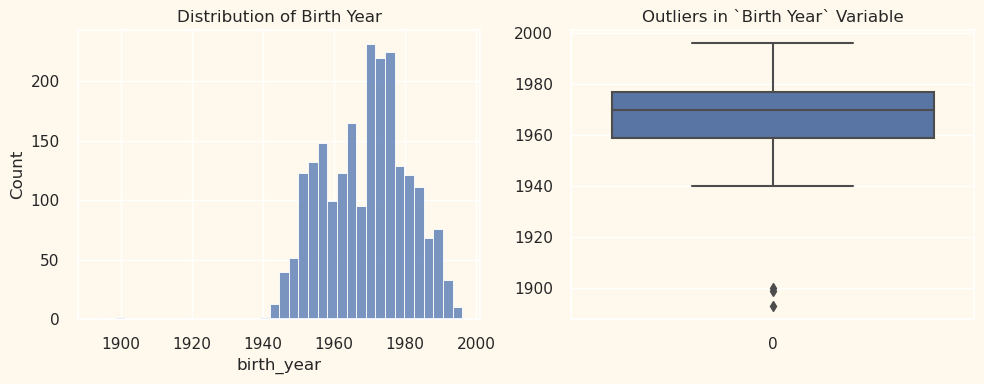

In [134]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['birth_year'],  ax = axes[0])
axes[0].set_title('Distribution of Birth Year')

sns.boxplot(data['birth_year'], ax = axes[1])
axes[1].set_title('Outliers in `Birth Year` Variable')

plt.tight_layout()


In [135]:
#Lets get the outliers in the birth year


q1 = data['birth_year'].quantile(.25)
q3 = data['birth_year'].quantile(.75)

iqr = q3-q1

outlier = data[data['birth_year'] < (q1 - 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


There are only 3 outliers present in the birth_year column. This suggests that the company have elderly customers as well.

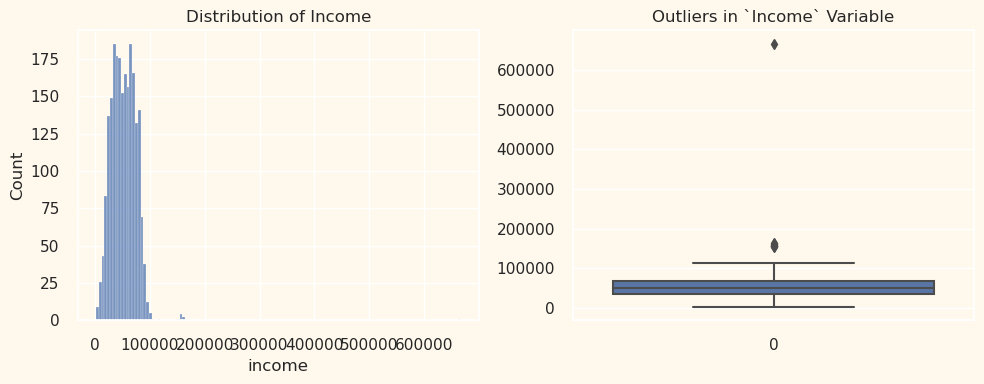

In [136]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['income'],ax = axes[0])
axes[0].set_title('Distribution of Income')

sns.boxplot(data['income'], ax = axes[1])
axes[1].set_title('Outliers in `Income` Variable')

plt.tight_layout()

In [137]:

q1 = data['income'].quantile(.25)
q3 = data['income'].quantile(.75)

iqr = q3-q1

outlier = data[data['income'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


From the distribution it is clear that the income variable is clustered together in the left. However, there are 8 outliers present which have relatvely high income than the rest. Since, this variable isn't introducing bias, we will leave them as it is.

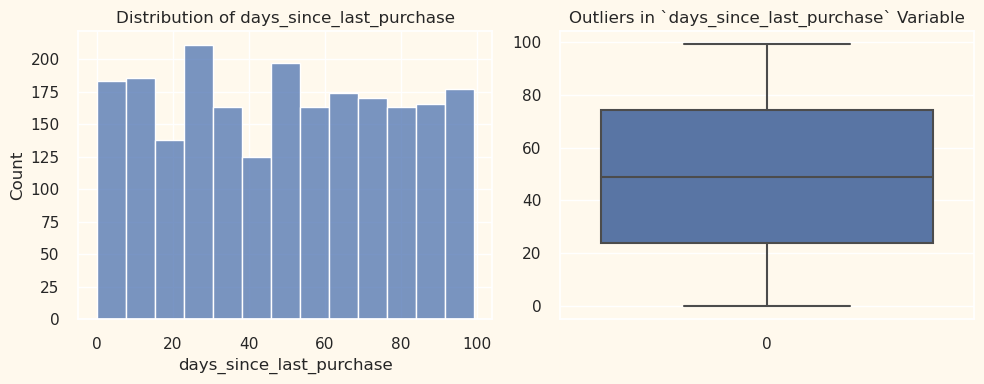

In [138]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['days_since_last_purchase'],ax = axes[0])
axes[0].set_title('Distribution of days_since_last_purchase')

sns.boxplot(data['days_since_last_purchase'],ax = axes[1])
axes[1].set_title('Outliers in `days_since_last_purchase` Variable')

plt.tight_layout()


The variable days_since_last_purchase is approximately uniformally distributed, and ranges from 0 to 100.

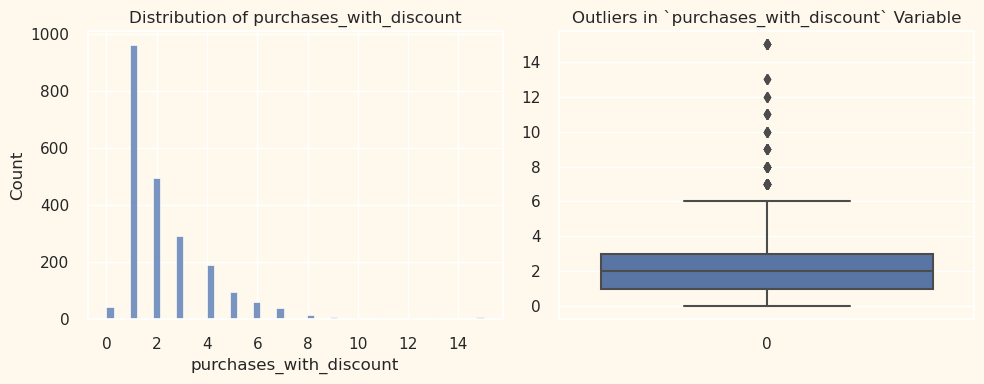

In [139]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['purchases_with_discount'],ax = axes[0])
axes[0].set_title('Distribution of purchases_with_discount')

sns.boxplot(data['purchases_with_discount'],ax = axes[1])
axes[1].set_title('Outliers in `purchases_with_discount` Variable')

plt.tight_layout()

In [140]:
q1 = data['purchases_with_discount'].quantile(.25)
q3 = data['purchases_with_discount'].quantile(.75)

iqr = q3-q1

outlier = data[data['purchases_with_discount'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0
24,1409,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,...,8,0,0,0,0,0,0,3,11,0
49,6566,1954,PhD,Married,72550.0,1,1,2012-11-08,39,826,...,8,0,0,0,0,0,0,3,11,0
54,9381,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,...,3,0,0,0,0,0,0,3,11,0
69,1357,1970,Graduation,Together,74854.0,1,2,2013-04-08,90,856,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,4865,1974,Master,Divorced,53367.0,1,1,2013-08-31,2,229,...,7,0,0,0,0,0,0,3,11,1
2144,5136,1973,Graduation,Single,65333.0,0,1,2014-01-17,58,654,...,6,0,1,1,0,0,0,3,11,0
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0


Most people have made purchases with a discount between 1 to 6 times. However, there are 84 outliers who have made purchases with a discount 7 times or more.

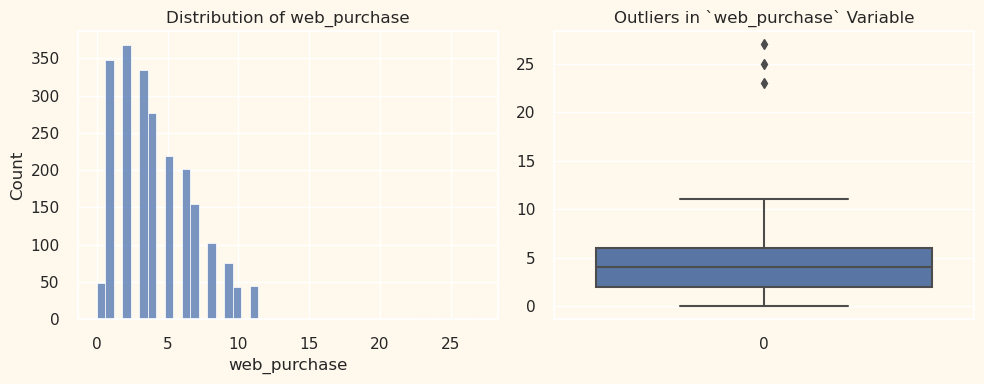

In [141]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['web_purchase'],ax = axes[0])
axes[0].set_title('Distribution of web_purchase')

sns.boxplot(data['web_purchase'], ax = axes[1])
axes[1].set_title('Outliers in `web_purchase` Variable')

plt.tight_layout()


In [142]:
q1 = data['web_purchase'].quantile(.25)
q3 = data['web_purchase'].quantile(.75)

iqr = q3-q1

outlier = data[data['web_purchase'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
1806,6237,1966,PhD,Single,7144.0,0,2,2013-12-07,92,81,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,1,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,3,11,0


The majority of web purchases fall within the range of 0 to 12, with only 3 outliers.

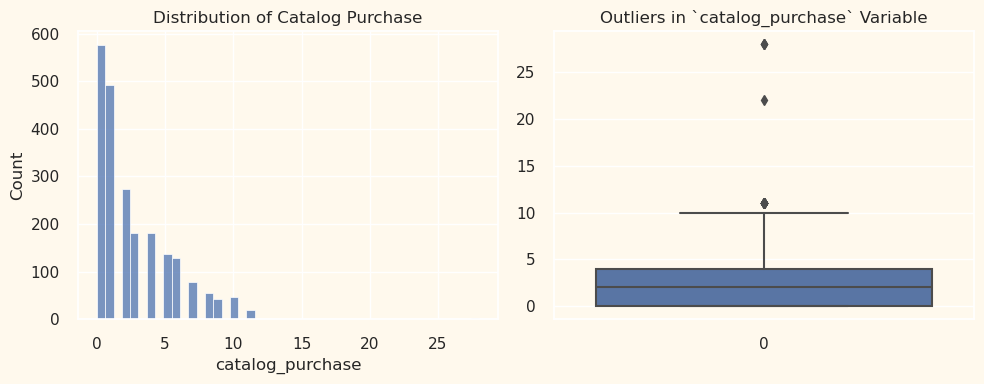

In [143]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['catalog_purchase'], ax = axes[0])
axes[0].set_title('Distribution of Catalog Purchase')

sns.boxplot(data['catalog_purchase'],ax = axes[1])
axes[1].set_title('Outliers in `catalog_purchase` Variable')

plt.tight_layout()

In [144]:
q1 = data['catalog_purchase'].quantile(.25)
q3 = data['catalog_purchase'].quantile(.75)

iqr = q3-q1

outlier = data[data['catalog_purchase'] > (q3 + 1.5 * iqr)]

outlier['catalog_purchase'].value_counts()

11    19
28     3
22     1
Name: catalog_purchase, dtype: int64

The majority of catalog purchases fall within the range of 0 to 10, with only 23 observations where the number of catalog purchases exceeds 10.

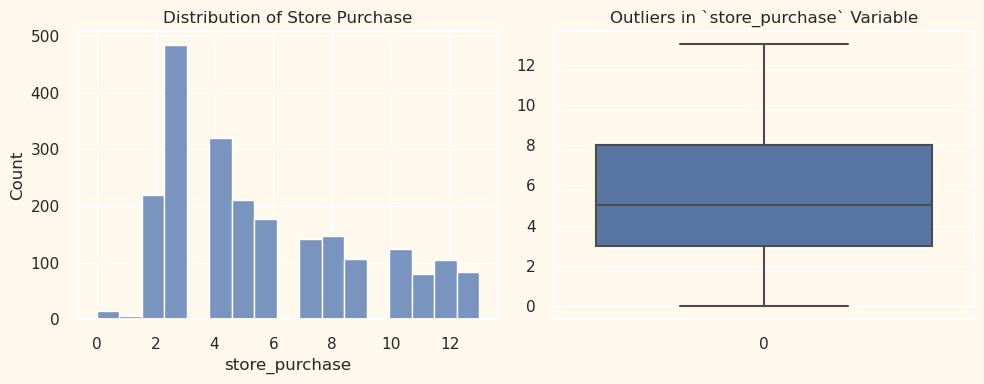

In [145]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['store_purchase'],ax = axes[0])
axes[0].set_title('Distribution of Store Purchase')

sns.boxplot(data['store_purchase'], ax = axes[1])
axes[1].set_title('Outliers in `store_purchase` Variable')

plt.tight_layout()

The number of store purchases falls within the range of 0 to 13, and there are no outliers for this variable.

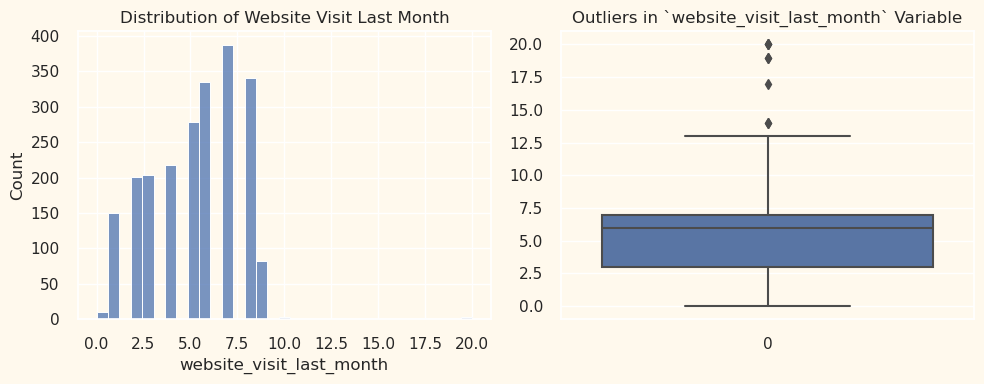

In [146]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['website_visit_last_month'],ax = axes[0])
axes[0].set_title('Distribution of Website Visit Last Month')

sns.boxplot(data['website_visit_last_month'], ax = axes[1])
axes[1].set_title('Outliers in `website_visit_last_month` Variable')

plt.tight_layout()

In [147]:
q1 = data['website_visit_last_month'].quantile(.25)
q3 = data['website_visit_last_month'].quantile(.75)

iqr = q3-q1

outlier = data[data['website_visit_last_month'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,...,20,0,0,0,0,0,0,3,11,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,14,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,20,0,0,0,0,0,0,3,11,0
1328,4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,...,17,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,19,0,0,0,0,0,0,3,11,0


The majority of website visits last month are in the range of 0 to 9, with 8 outlier observations having more than 16 visits on the website last month.

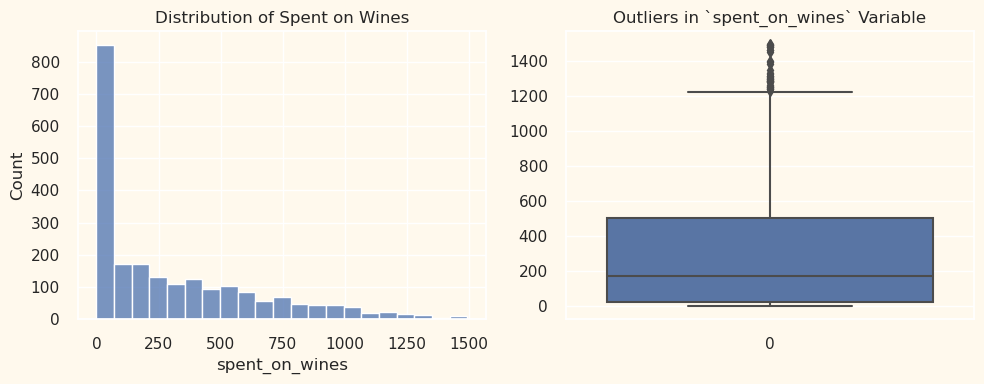

In [148]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['spent_on_wines'],ax = axes[0])
axes[0].set_title('Distribution of Spent on Wines')

sns.boxplot(data['spent_on_wines'],ax = axes[1])
axes[1].set_title('Outliers in `spent_on_wines` Variable')

plt.tight_layout()

In [149]:
q1 = data['spent_on_wines'].quantile(.25)
q3 = data['spent_on_wines'].quantile(.75)

iqr = q3-q1

outlier = data[data['spent_on_wines'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
111,7431,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,...,9,0,1,0,0,0,0,3,11,1
161,9260,1945,PhD,Married,70356.0,0,0,2012-11-05,20,1349,...,6,0,0,0,0,0,0,3,11,0
295,2926,1952,Master,Together,55951.0,0,1,2012-08-23,62,1241,...,8,0,1,0,0,1,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,2,0,0,1,0,0,0,3,11,0
430,3725,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,...,4,0,1,1,1,1,0,3,11,1
466,7999,1955,PhD,Together,75261.0,0,0,2013-04-23,17,1239,...,2,0,1,1,0,0,0,3,11,1
497,11088,1971,PhD,Together,78642.0,0,1,2013-04-21,83,1396,...,6,0,0,0,0,0,0,3,11,0
515,203,1975,Master,Single,81169.0,0,0,2013-04-14,47,1288,...,2,0,0,0,0,0,0,3,11,0
523,4943,1953,Graduation,Married,70503.0,0,0,2012-09-30,73,1379,...,6,0,1,1,0,0,0,3,11,0
543,5547,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,...,3,0,1,1,0,0,0,3,11,1


The data is highly skewed to the right, indicating that the majority of people either don't drink wine or prefer to purchase it from other sources. Only 35 customers have spent more than $1000 on wine.

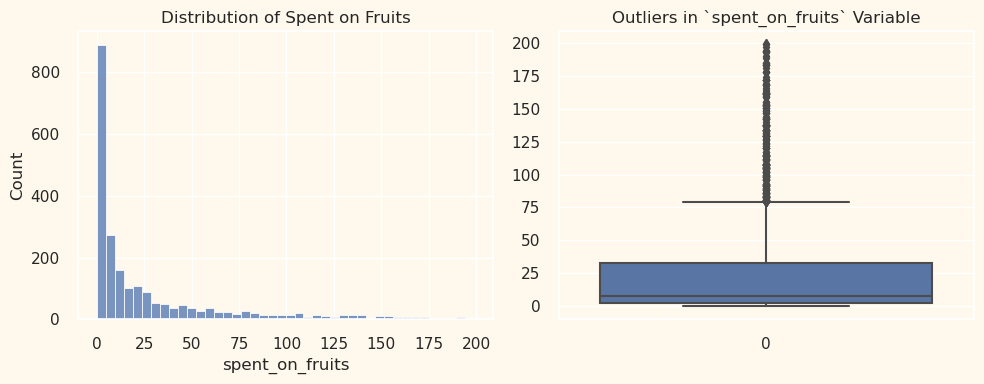

In [150]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['spent_on_fruits'],ax = axes[0])
axes[0].set_title('Distribution of Spent on Fruits')

sns.boxplot(data['spent_on_fruits'], ax = axes[1])
axes[1].set_title('Outliers in `spent_on_fruits` Variable')

plt.tight_layout()

In [151]:
q1 = data['spent_on_fruits'].quantile(.25)
q3 = data['spent_on_fruits'].quantile(.75)

iqr = q3-q1

outlier = data[data['spent_on_fruits'] > (q3 + 1.5 * iqr)]
outlier['spent_on_fruits']

0        88
18       80
29      100
45      164
53      120
       ... 
2185    142
2194     80
2203    124
2206    129
2217    194
Name: spent_on_fruits, Length: 246, dtype: int64

The majority of customers have spent less than $60 on fruits

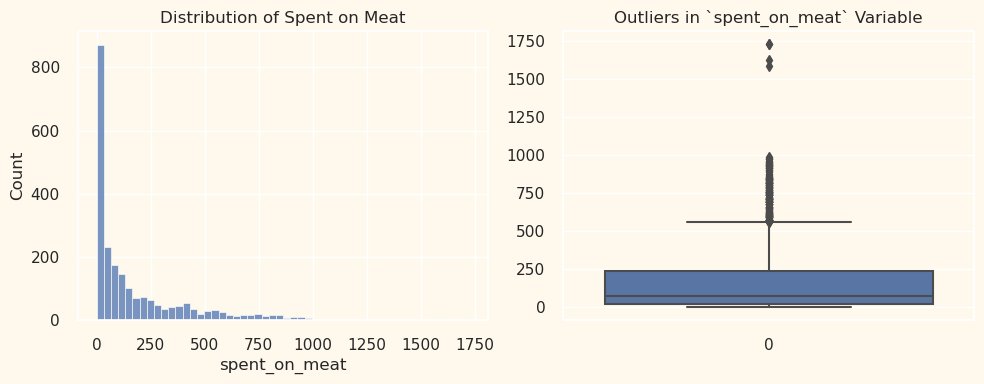

In [152]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['spent_on_meat'], ax = axes[0])
axes[0].set_title('Distribution of Spent on Meat')

sns.boxplot(data['spent_on_meat'], ax = axes[1])
axes[1].set_title('Outliers in `spent_on_meat` Variable')

plt.tight_layout()

In [153]:
q1 = data['spent_on_meat'].quantile(.25)
q3 = data['spent_on_meat'].quantile(.75)

iqr = q3-q1

outlier = data[data['spent_on_meat'] > (q3 + 1.5 * iqr)]
outlier['spent_on_meat']

21      1725
29       801
51       780
76       925
77       779
        ... 
2187     749
2190     655
2193     845
2211     860
2213     631
Name: spent_on_meat, Length: 174, dtype: int64

The majority of customers have spent less than $1000 on meat.

Text(0.5, 1.0, 'Outliers in `spent_on_fish` Variable')

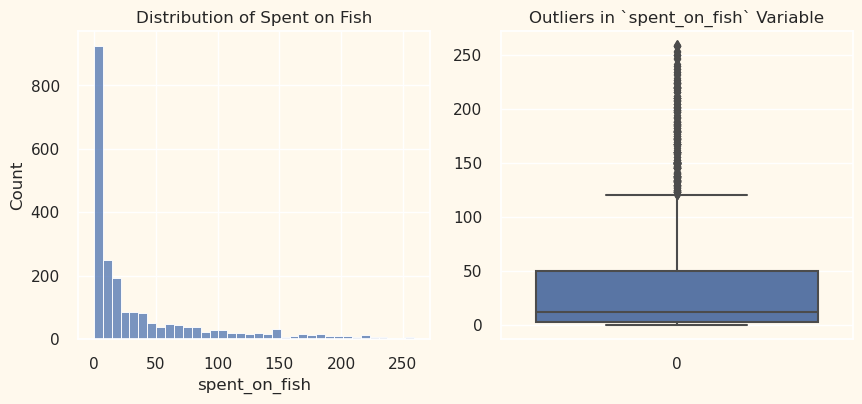

In [154]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['spent_on_fish'],  ax = axes[0])
axes[0].set_title('Distribution of Spent on Fish')

sns.boxplot(data['spent_on_fish'],ax = axes[1])
axes[1].set_title('Outliers in `spent_on_fish` Variable')

In [155]:
q1 = data['spent_on_fish'].quantile(.25)
q3 = data['spent_on_fish'].quantile(.75)

iqr = q3-q1

outlier = data[data['spent_on_fish'] > (q3 + 1.5 * iqr)]
outlier['spent_on_fish']

0       172
12      225
17      150
39      160
45      227
       ... 
2188    199
2190    145
2193    202
2206    182
2217    149
Name: spent_on_fish, Length: 222, dtype: int64

Text(0.5, 1.0, 'Outliers in `spent_on_sweet` Variable')

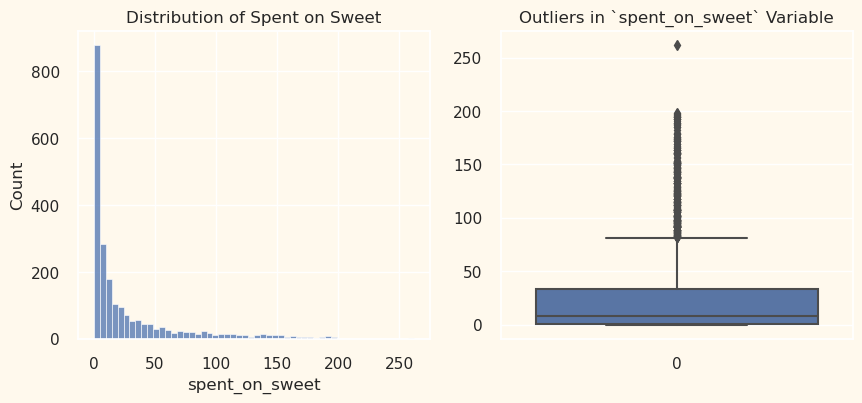

In [156]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['spent_on_sweet'],ax = axes[0])
axes[0].set_title('Distribution of Spent on Sweet')

sns.boxplot(data['spent_on_sweet'], ax = axes[1])
axes[1].set_title('Outliers in `spent_on_sweet` Variable')

In [157]:
q1 = data['spent_on_sweet'].quantile(.25)
q3 = data['spent_on_sweet'].quantile(.75)

iqr = q3-q1

outlier = data[data['spent_on_sweet'] > (q3 + 1.5 * iqr)]
outlier['spent_on_sweet']

0        88
12      112
40      178
51      167
55      120
       ... 
2175     92
2190    111
2193    133
2217    125
2235    118
Name: spent_on_sweet, Length: 246, dtype: int64

Text(0.5, 1.0, 'Outliers in `spent_on_gold Variable')

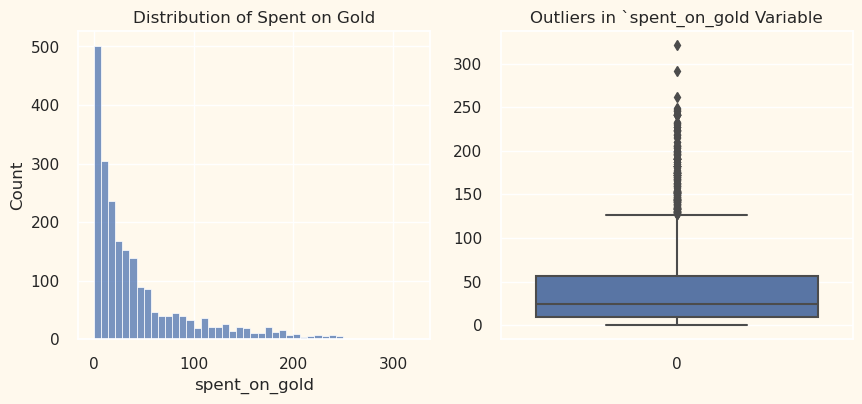

In [158]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(data['spent_on_gold'], ax = axes[0])
axes[0].set_title('Distribution of Spent on Gold')

sns.boxplot(data['spent_on_gold'], ax = axes[1])
axes[1].set_title('Outliers in `spent_on_gold Variable')

In [159]:
q1 = data['spent_on_gold'].quantile(.25)
q3 = data['spent_on_gold'].quantile(.75)

iqr = q3-q1

outlier = data[data['spent_on_gold'] > (q3 + 1.5 * iqr)]
outlier['spent_on_gold']

18      176
45      174
53      241
55      190
62      169
       ... 
2178    227
2188    163
2194    174
2198    152
2235    247
Name: spent_on_gold, Length: 205, dtype: int64

In [160]:
data['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [161]:
data['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

The variables Z_CostContact and Z_Revenue each contain only a single value throughout their respective columns. As a result, they do not contribute any valuable insights to our analysis. Consequently, we can safely eliminate these variables from our dataset.

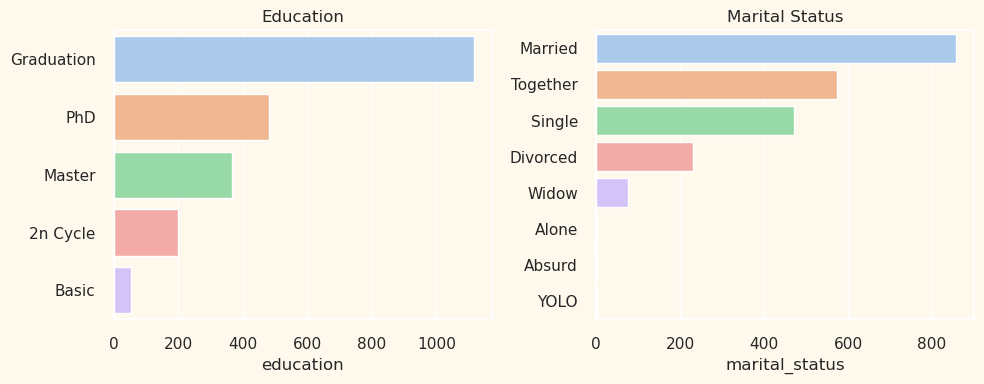

In [162]:
education = data['education'].value_counts()
marital_status = data['marital_status'].value_counts()

fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.barplot(x = education,y = education.index, palette= 'pastel', ax = axes[0])
axes[0].set_title('Education')

sns.barplot(x = marital_status,y = marital_status.index, palette='pastel', ax = axes[1])
axes[1].set_title('Marital Status')

plt.tight_layout()

In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [163]:
data["enrollment_date"]=pd.to_datetime(data["enrollment_date"], format="%d-%m-%Y")
dates = []
for i in data["enrollment_date"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [164]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["customer_for"] = days
data["customer_for"] = pd.to_numeric(data["customer_for"], errors="coerce")

In [165]:
print("Total categories in the feature Marital_Status:\n", data["marital_status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: education, dtype: int64


In the next bit, I will be performing the following steps to engineer some new features:

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, Creating feature indicating "Family_Size"
Create a feature "Is_Parent" to indicate parenthood status
Lastly, I will create three categories in the "Education" by simplifying its value counts.
Dropping some of the redundant features

## Feature engineering

In [166]:
data["age"] = 2023-data["birth_year"]

#Total spending's on various items
data["spent"] = data["spent_on_wines"]+ data["spent_on_fruits"]+ data["spent_on_meat"]+ data["spent_on_fish"]+ data["spent_on_sweet"]+ data["spent_on_gold"]

#Deriving living situation by marital status"Alone"
data["living_with"]=data["marital_status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["children"]=data["kids"]+data["teens"]

#Feature for total members in the householde
data["family_size"] = data["living_with"].replace({"Alone": 1, "Partner":2})+ data["children"]

#Feature pertaining parenthood
data["is_parent"] = np.where(data.children> 0, 1, 0)

#Segmenting education levels in three groups
data["education"]=data["education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Dropping some of the redundant features
to_drop = ["marital_status", "enrollment_date", "Z_CostContact", "Z_Revenue", "birth_year", "ID"]
data = data.drop(to_drop, axis=1)

In [167]:
data.describe()

,income,kids,teens,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,spent_on_gold,...,campaign1,campaign2,complain,last_campaign,customer_for,age,spent,children,family_size,is_parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


The statistics presented above reveal disparities in both mean income and age, as well as the maximum income and age.

It's worth noting that the maximum recorded age is 130 years. This may be due to the calculation of ages based on the current year (2023) using older data.

To gain a more comprehensive understanding of the data, I will proceed to visualize selected features through plotting.

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

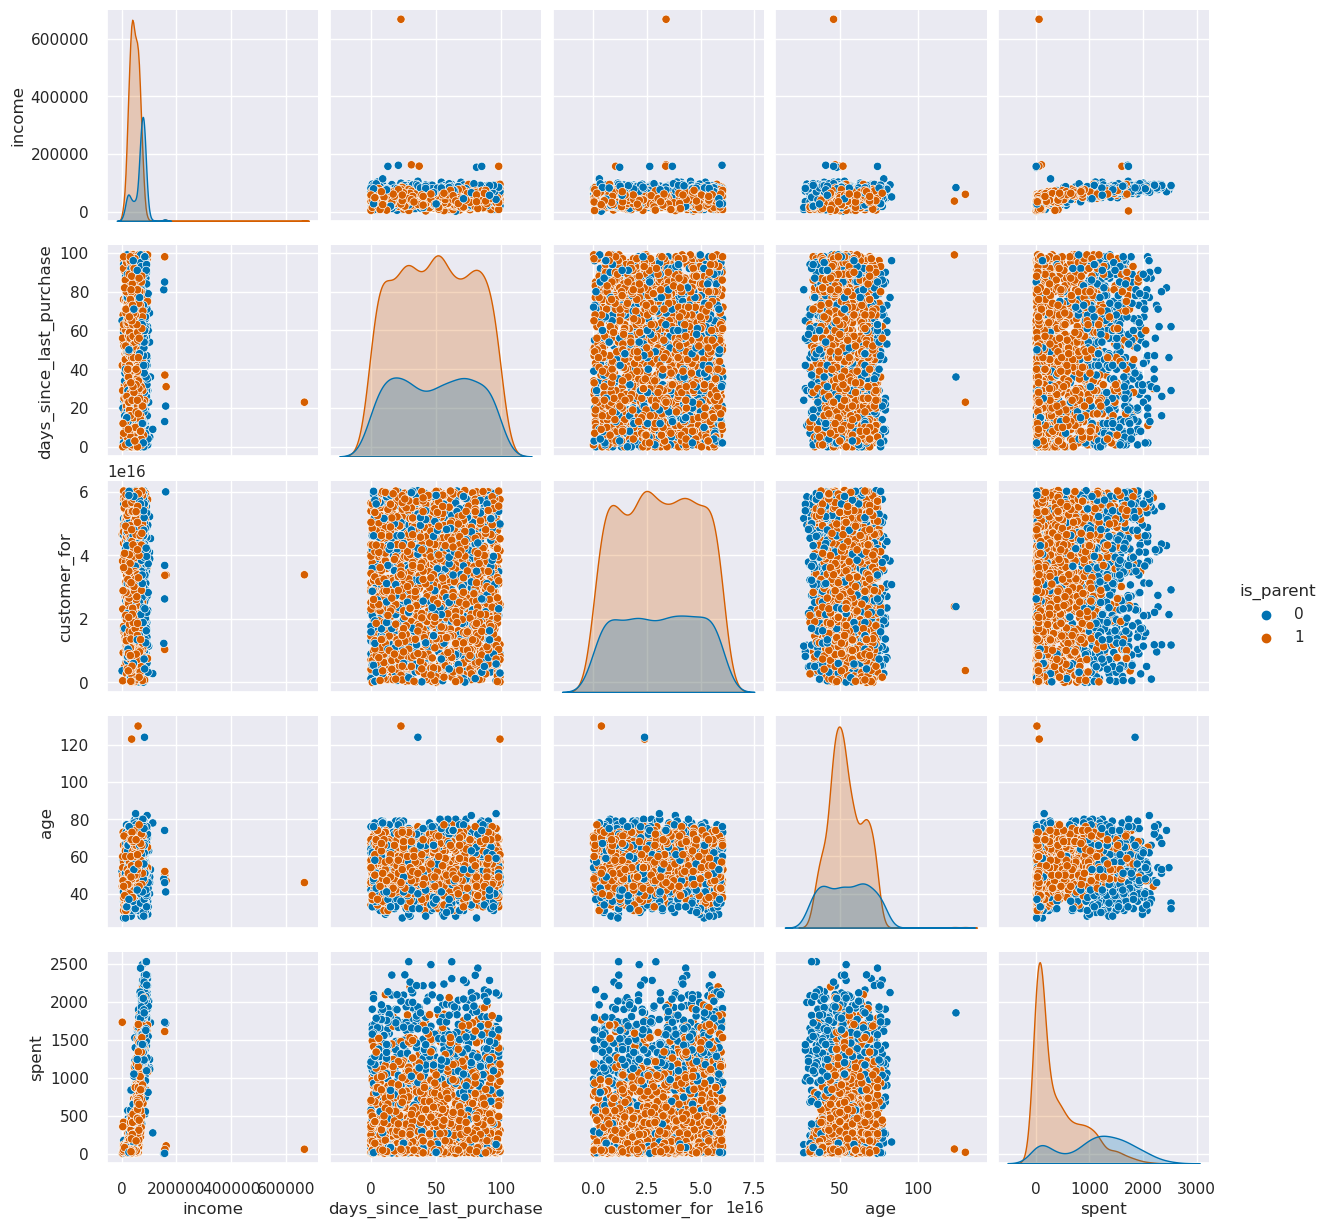

In [168]:
sns.set()

# Define a custom palette with blue and red colors
custom_palette = ["#0072B2", "#D55E00"]

# Plotting the following features
To_Plot = ["income", "days_since_last_purchase", "customer_for", "age", "spent", "is_parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")

# Use the custom color palette
plt.figure()
sns.pairplot(data[To_Plot], hue="is_parent", palette=custom_palette)
plt.show()

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [169]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["age"]<90)]
data = data[(data["income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


Next, let us look at the correlation among the features.(Excluding the categorical values at this point)

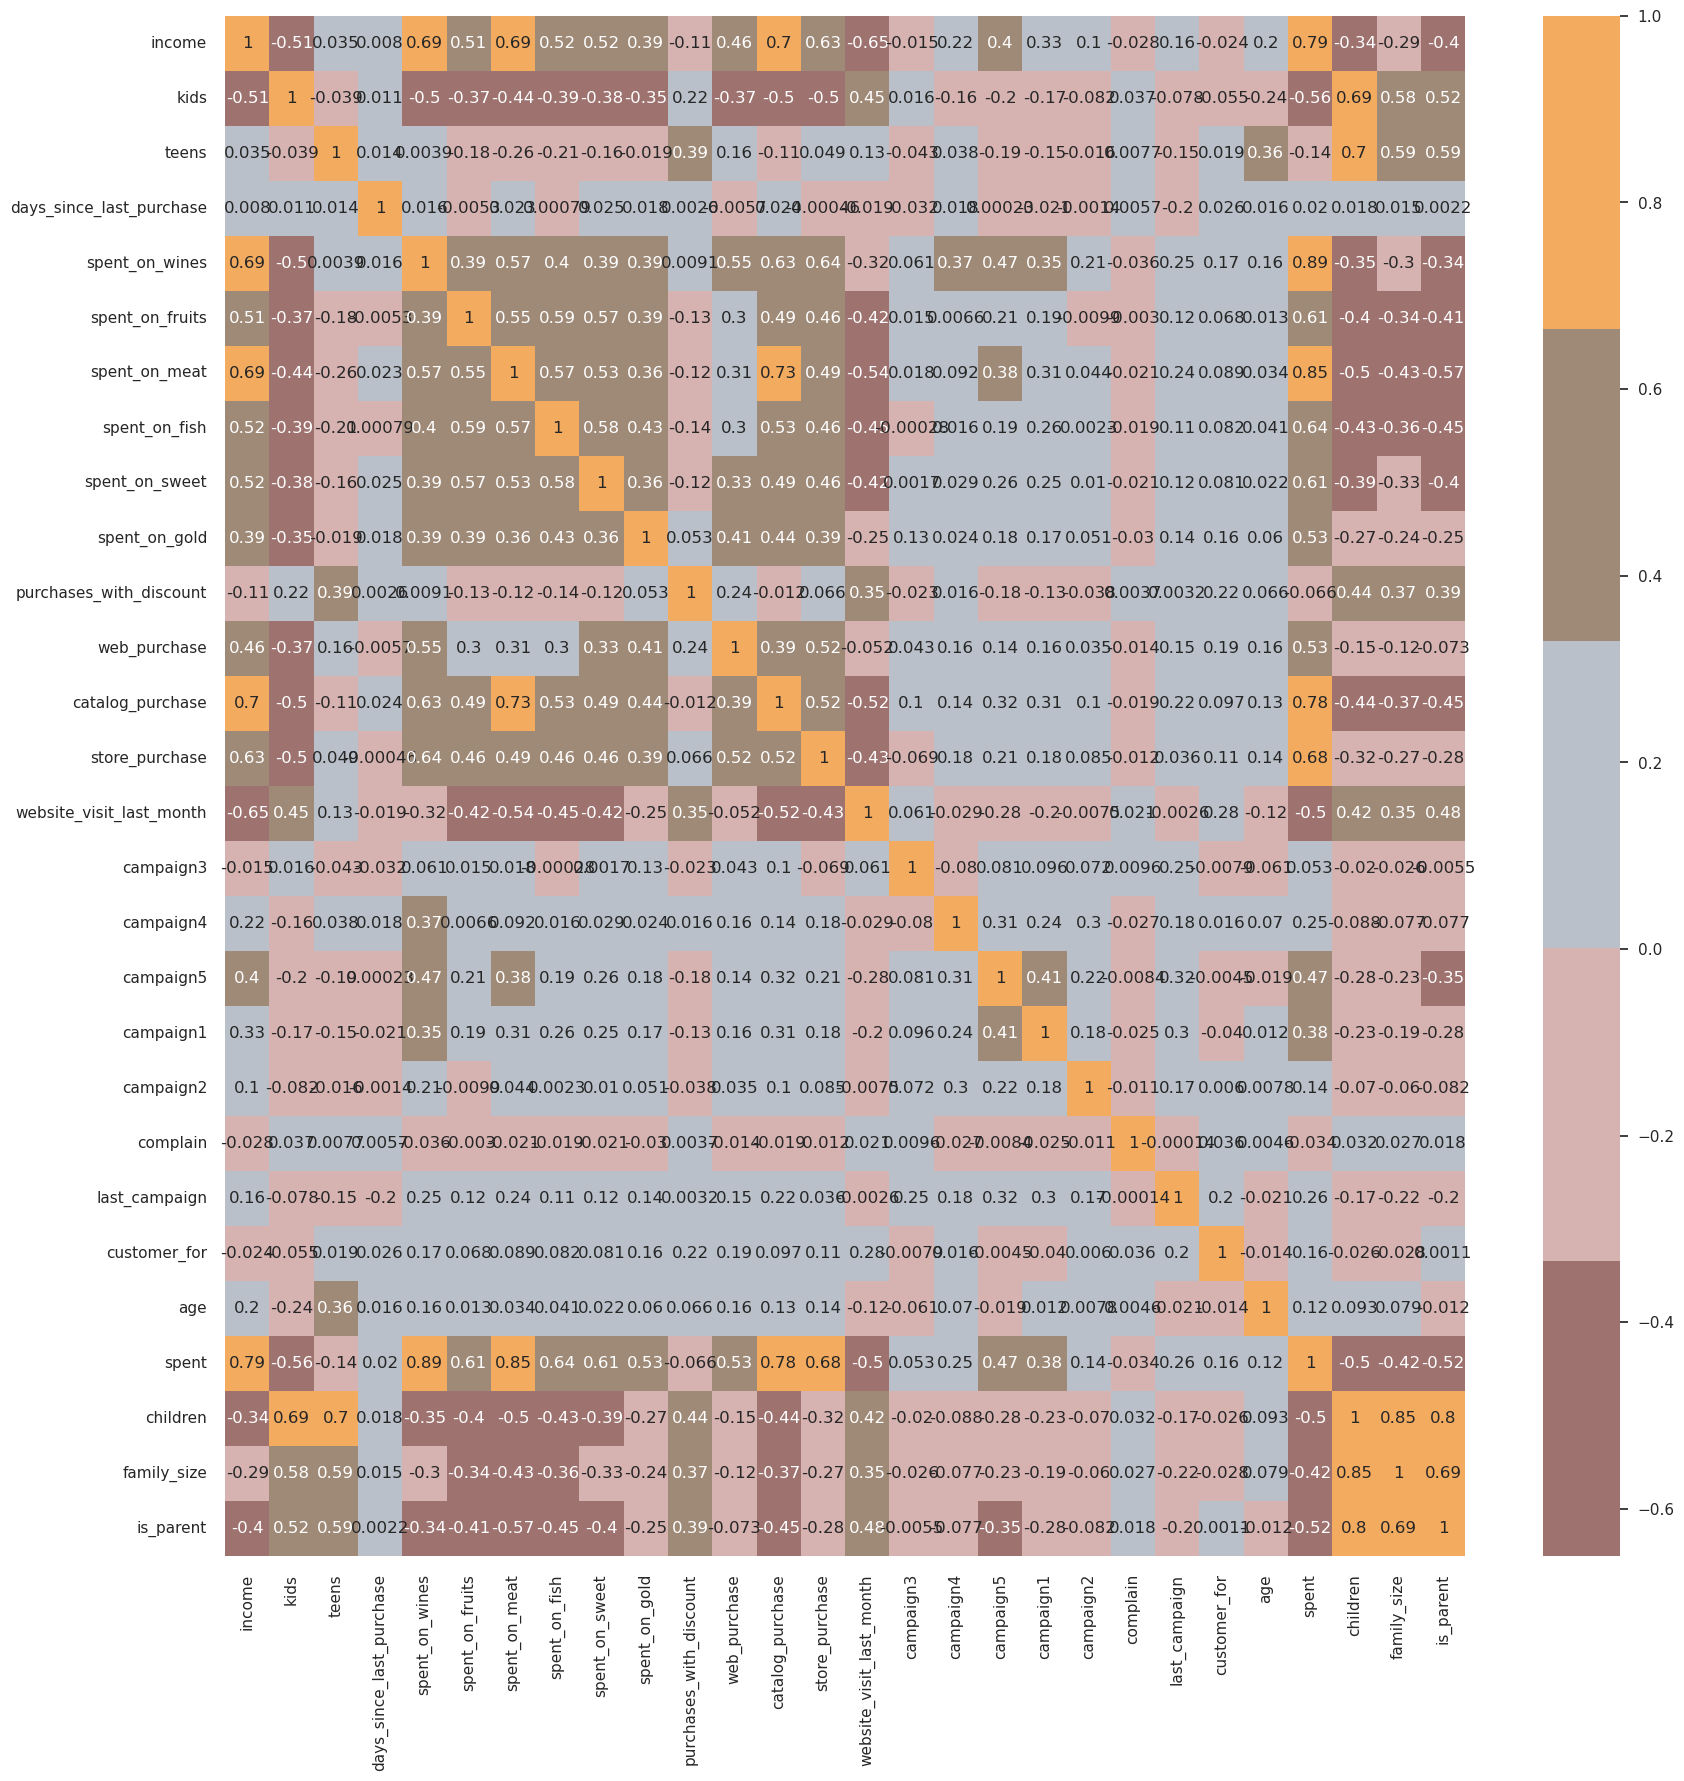

In [170]:
#correlation matrix
numeric_data = data.select_dtypes(include=['number'])  # Select numeric columns only
corrmat = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.show()

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

    Label encoding the categorical features
    Scaling the features using the standard scaler
    Creating a subset dataframe for dimensionality reduction


In [171]:
#Get List of categorical variables
s=(data.dtypes=='object')
object_cols=list(s[s].index)

print("Categorical variables in the dataset:",object_cols)

Categorical variables in the dataset: ['education', 'living_with']


In [172]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [173]:
#creating a copy of data
ds=data.copy()
#creating a subset of datafrae by dropping the features on deals accepted and promotions
cols_del=['campaign3', 'campaign4', 'campaign5', 'campaign1','campaign2', 'complain', 'last_campaign']
ds=ds.drop(cols_del,axis=1)
#Scaling
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("ALL feature are now scaled")

ALL feature are now scaled


In [174]:
ds.head()

,education,income,kids,teens,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,...,catalog_purchase,store_purchase,website_visit_last_month,customer_for,age,spent,living_with,children,family_size,is_parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,57283200000000000,66,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,9763200000000000,69,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,26956800000000000,58,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,12009600000000000,39,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,13910400000000000,42,422,1,1,3,1


In [175]:
#Scaled Data to be used for reducing dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,education,income,kids,teens,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,...,catalog_purchase,store_purchase,website_visit_last_month,customer_for,age,spent,living_with,children,family_size,is_parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## Dimensionality Reduction

In this problem, the final classification depends on several factors, which are essentially attributes or features. Dealing with a large number of features can be challenging, particularly when many of these features are correlated and, therefore, redundant. To address this issue, I will perform dimensionality reduction on the selected features before subjecting them to a classification algorithm. Dimensionality reduction involves the process of reducing the number of random variables considered by identifying a set of principal variables.

One effective technique for dimensionality reduction is Principal Component Analysis (PCA). PCA allows us to reduce the dimensionality of datasets, making them more interpretable while minimizing the loss of information.

The steps in this section include:

1. Dimensionality reduction with PCA
2. Plotting the reduced dataframe
3. Further dimensionality reduction with PCA

These steps aim to simplify the dataset, enhance its interpretability, and facilitate more efficient processing by retaining the most relevant information while reducing redundancy.

In [176]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-6.424437e-17,2.878602,-5.978122,-2.539471,-0.781595,2.386380,7.452915
col2,2212.0,-1.927331e-17,1.709469,-4.194792,-1.323900,-0.173785,1.234872,6.168062
col3,2212.0,7.468408e-17,1.231685,-3.624439,-0.854266,-0.050787,0.864593,6.749379


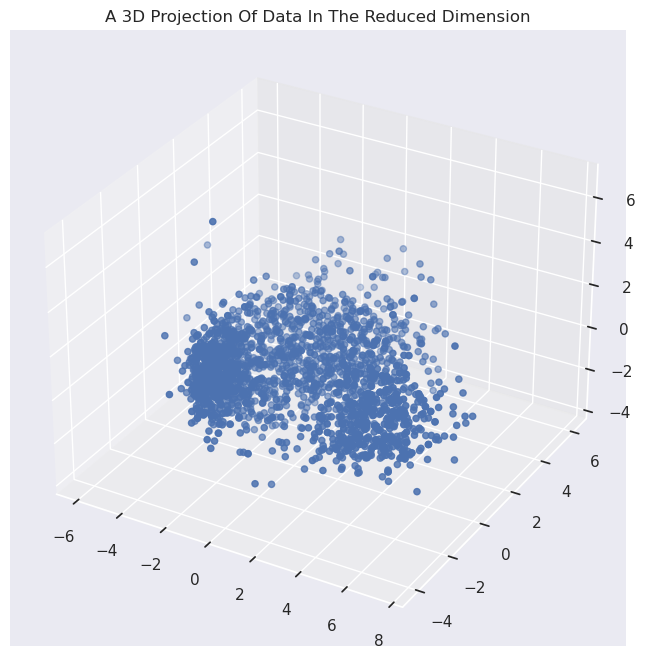

In [177]:
#A 3D Projection of data in the Reduced Dimension
x=PCA_ds["col1"]
y=PCA_ds["col2"]
z=PCA_ds["col3"]

#To Plot
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

Steps involved in the Clustering

* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot


Elbow Method to determine the number of clusters to be formed:


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/roy/anaconda3/lib/python3.

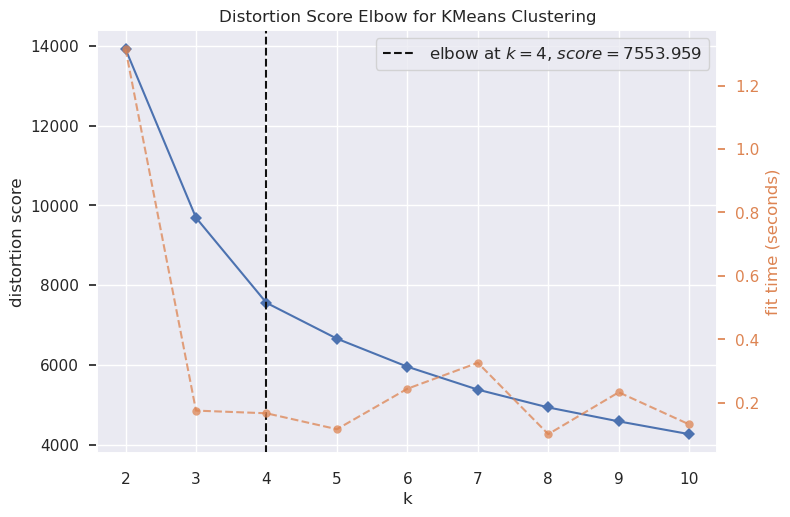

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [178]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [179]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

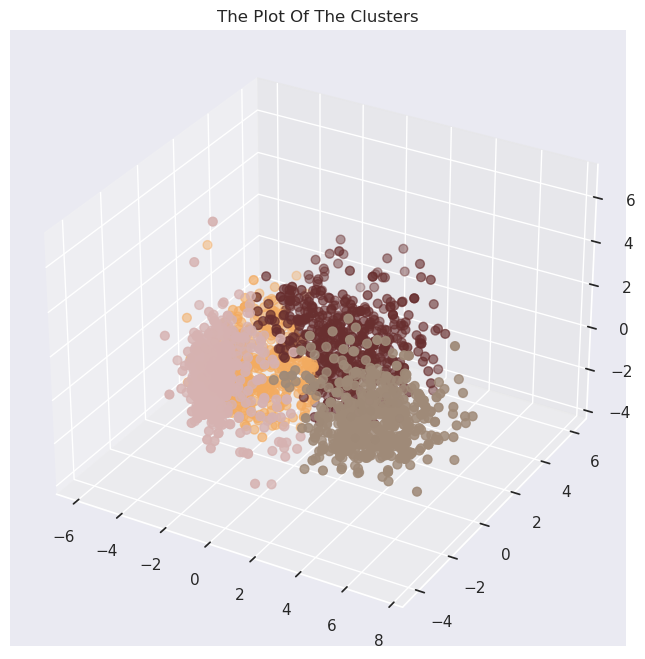

In [182]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

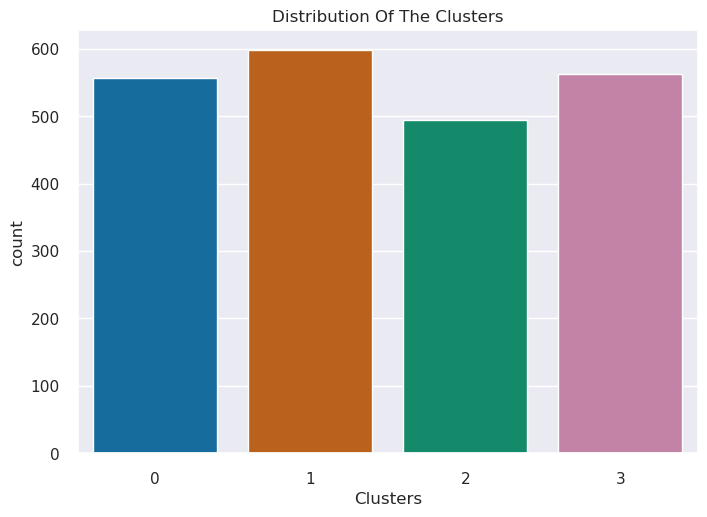

In [183]:
custom_palette = ["#0072B2", "#D55E00", "#009E73", "#CC79A7"]

# Create a countplot with the custom color palette
pl = sns.countplot(x=data["Clusters"], palette=custom_palette)
pl.set_title("Distribution Of The Clusters")
plt.show()

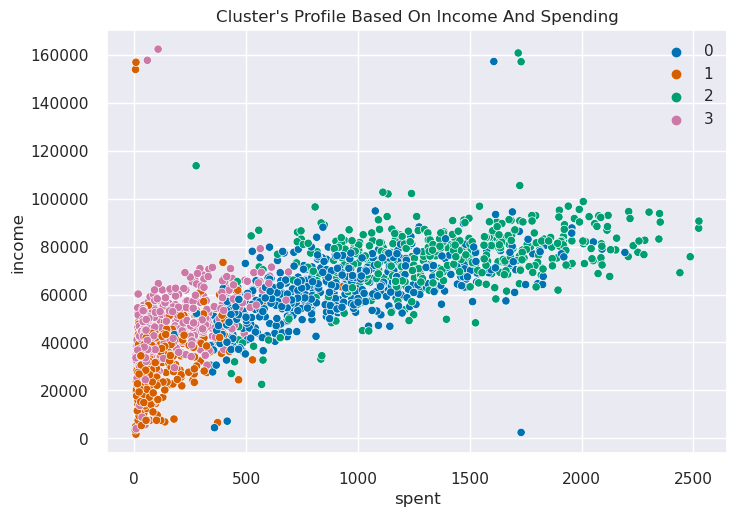

In [186]:
pl = sns.scatterplot(data = data,x=data["spent"], y=data["income"],hue=data["Clusters"], palette= custom_palette)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

    group 0: high spending & average income
    group 1: high spending & high income
    group 2: low spending & low income
    group 3: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

/home/roy/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roy/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roy/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roy/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roy/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: Us

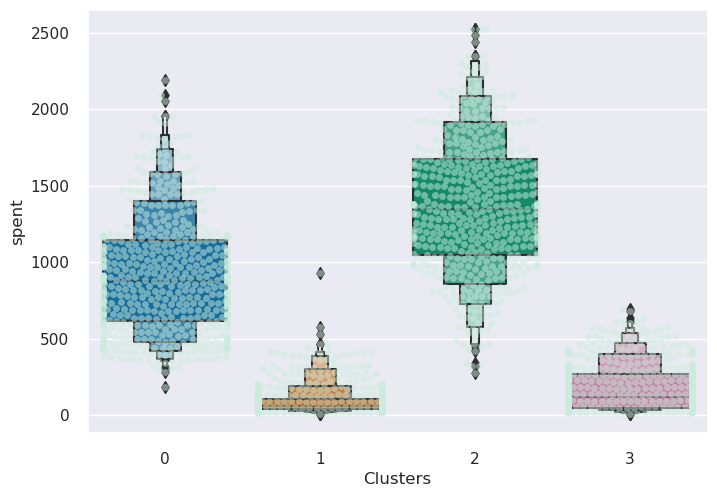

In [187]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["spent"], palette=custom_palette)
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

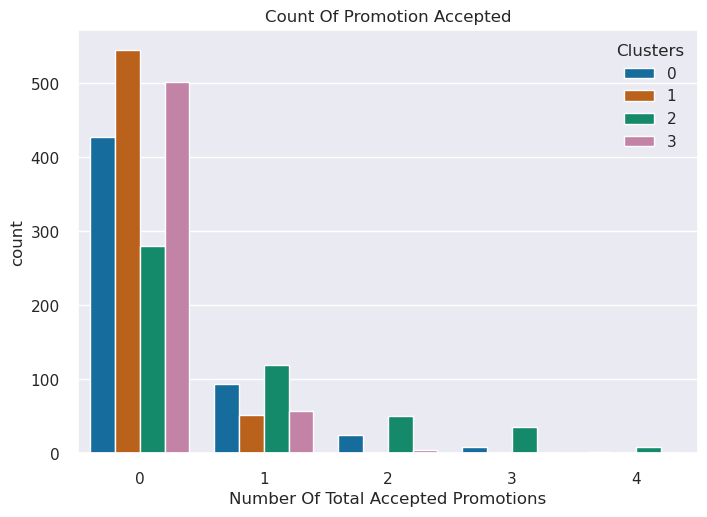

In [189]:
#Creating a feature to get a sum of accepted promotions 
data["purchases_with_discount"] = data["campaign1"]+ data["campaign2"]+ data["campaign3"]+ data["campaign4"]+ data["campaign5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["purchases_with_discount"],hue=data["Clusters"], palette= custom_palette)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

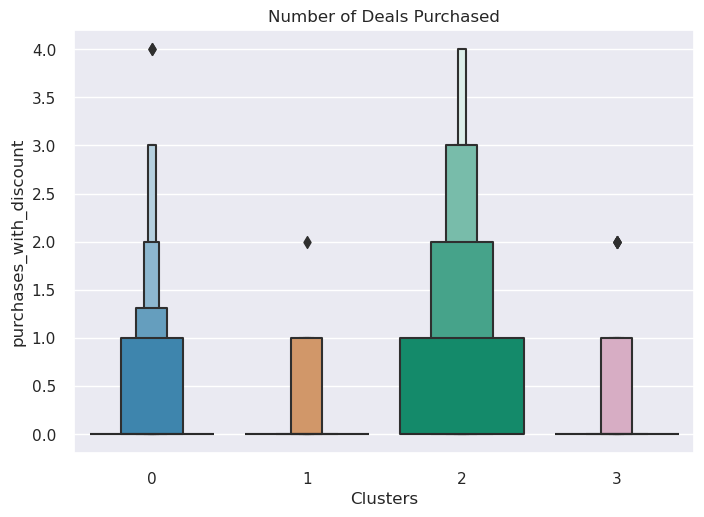

In [190]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["purchases_with_discount"],x=data["Clusters"], palette= custom_palette)
pl.set_title("Number of Deals Purchased")
plt.show()